In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create Dataset

In [7]:
# K=3

#class1
x1=np.random.normal(25,5,1000)
y1=np.random.normal(25,5,1000)

#class2
x2=np.random.normal(55,5,1000)
y2=np.random.normal(60,5,1000)

#class3
x3=np.random.normal(55,5,1000)
y3=np.random.normal(15,5,1000)

In [11]:
x=np.concatenate((x1,x2,x3),axis=0)
y=np.concatenate((y1,y2,y3),axis=0)

In [12]:
dictionary={"x":x,"y":y}

In [15]:
data=pd.DataFrame(dictionary)
data

#3000 sample 2 feature

,x,y
0,31.418853,24.033069
1,21.470473,30.665511
2,21.462515,19.585652
3,25.777000,21.358270
4,23.668945,24.460168
...,...,...
2995,50.068735,12.639862
2996,46.503944,18.697081
2997,61.996039,7.654808
2998,60.149732,15.221426


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       3000 non-null   float64
 1   y       3000 non-null   float64
dtypes: float64(2)
memory usage: 47.0 KB


In [18]:
data.describe()

,x,y
count,3000.000000,3000.000000
mean,44.904014,33.406604
std,14.969162,20.086628
min,8.900014,-0.544423
25%,28.362543,17.346609
50%,51.567049,25.052538
75%,56.425824,56.895484
max,69.630490,74.694487


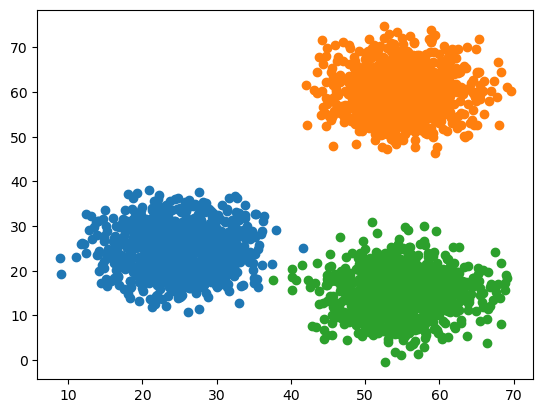

In [21]:
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.show()
#3 class 

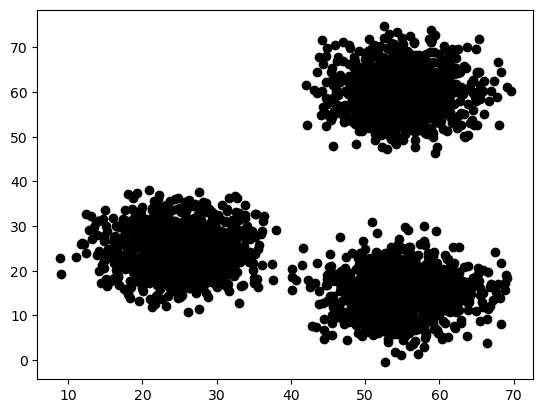

In [23]:
plt.scatter(x1,y1,color="black")
plt.scatter(x2,y2,color="black")
plt.scatter(x3,y3,color="black")
plt.show()
#3 class 

Aslında Kmeans algoritması bunu görüyor ben 3 sınıf olduğunu biliyorum ama kmeans bilmiyor bunu ayırt edecek

Actually, the Kmeans algorithm sees this, I know there are 3 classes, but Kmeans does not know how to distinguish it.

/Users/muhammeteminozdemir/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/muhammeteminozdemir/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/muhammeteminozdemir/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/muhammeteminozdemir/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureW

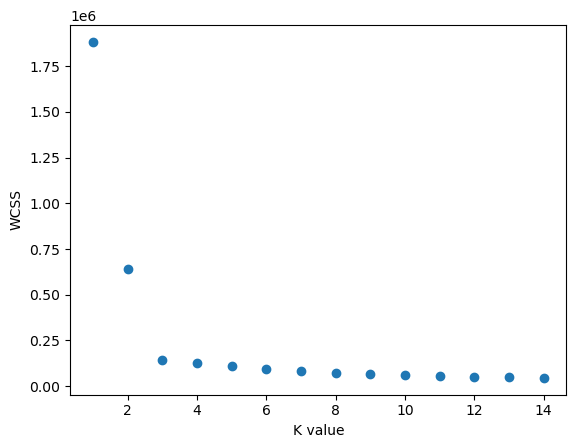

In [30]:
# select k value

from sklearn.cluster import KMeans

wcss=[]  #değerleri bu boş listeye atmak için

for k in range(1,15):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)  #inertia her bir değer için wcss değeri bul demek
    
plt.scatter(range(1,15),wcss)
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

# 3 de daha uygun grmeyi bekliyorum dirsek kuralı

In [37]:
#k value = 3 for model

kmeans2=KMeans(n_clusters=3)
cluster=kmeans2.fit_predict(data)  #fit et daha sonra predict yap
cluster

/Users/muhammeteminozdemir/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [38]:
# label dataya ekleme 3 label buldu 0 1 2 class ları oluşturdu

data["label"]=cluster
data

,x,y,label
0,31.418853,24.033069,2
1,21.470473,30.665511,2
2,21.462515,19.585652,2
3,25.777000,21.358270,2
4,23.668945,24.460168,2
...,...,...,...
2995,50.068735,12.639862,0
2996,46.503944,18.697081,0
2997,61.996039,7.654808,0
2998,60.149732,15.221426,0


In [40]:
data["label"].value_counts()

2    1000
0    1000
1    1000
Name: label, dtype: int64

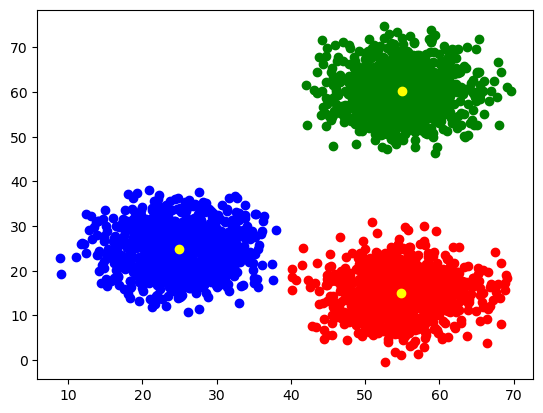

In [41]:
plt.scatter(data.x[data.label == 0 ],data.y[data.label == 0],color = "red")
plt.scatter(data.x[data.label == 1 ],data.y[data.label == 1],color = "green")
plt.scatter(data.x[data.label == 2 ],data.y[data.label == 2],color = "blue")
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color = "yellow")
plt.show()